Metin Abadan  - 19050111015

Sertac İnce  - 20050111003

## Loading Dataset

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

In [39]:
X = iris.data
y = iris.target

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Splitting Data

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Fit and Predict Functions in General

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random
import time

# Returns the most common element in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

# Euclidean distance between points & data
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


new_Xtest = np.zeros(0)
new_Ytest = np.zeros(0)

def fitAndPredict(X_train, y_train, X_test, n_neighbors, test_ratio):
	global  new_Xtest, new_Ytest
	
	new_len = int(len(X_test) * test_ratio)
	new_Xtest = np.zeros(shape=[new_len, 4])
	new_Ytest = np.zeros(new_len)

	# selecting random indices due to the test ratio
	rand_indices = random.sample(range(len(X_test)), new_len)

	k=0
	for i in rand_indices:
		new_Xtest[k] = X_test[i]
		new_Ytest[k] = y_test[i]
		k+=1

	#prediction part
	neighbors = []
	for x in new_Xtest:
		distances = euclidean(x, X_train)
		y_sorted = [y for _, y in sorted(zip(distances, y_train))]
		neighbors.append(y_sorted[:n_neighbors])
	 
	return list(map(most_common, neighbors))


## Model Evaluation

### Changing k values

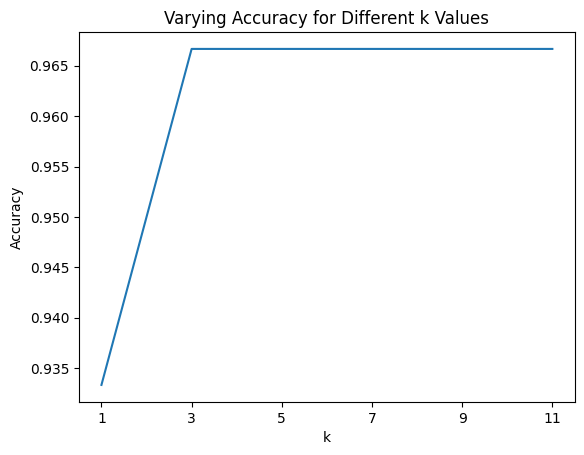

In [63]:
accuracies = []
computation_times = []

ks = np.arange(1, 12, 2)
for k in ks:
  start = time.time()
  y_pred = fitAndPredict(X_train, y_train, X_test, n_neighbors=k, test_ratio=1)
  computation_times.append((time.time()-start) * 10**3)
  accuracy = sum(y_pred == new_Ytest) / len(new_Ytest)
  accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)

x_ticks = [1, 3, 5, 7, 9, 11]
x_labels = [1, 3, 5, 7, 9, 11]
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Varying Accuracy for Different k Values")
plt.show()

### Examination of computation times for different k values

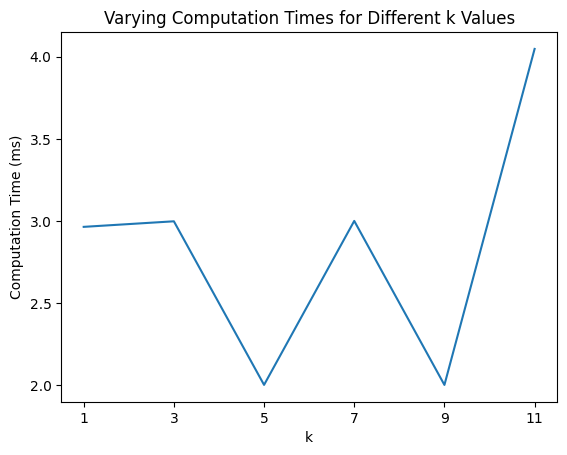

In [64]:
fig, ax = plt.subplots()
ax.plot(ks, computation_times)

x_ticks = [1, 3, 5, 7, 9, 11]
x_labels = x_ticks
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="k",
       ylabel="Computation Time (ms)",
       title="Varying Computation Times for Different k Values")
plt.show()

### Changing Test Ratio

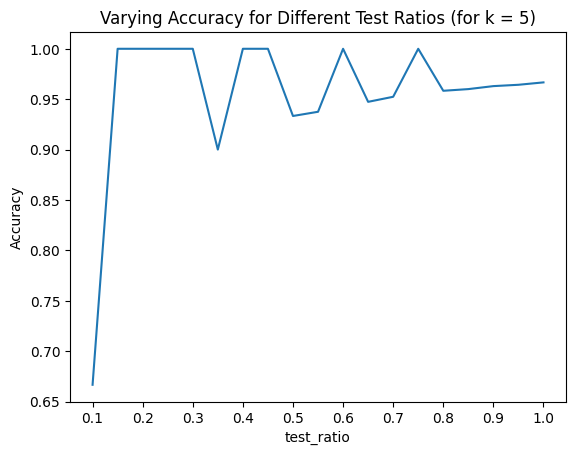

In [105]:
accuracies = []
computation_times = []
ks = np.arange(0.1, 1.01, 0.05)
for k in ks:
  start = time.time()
  y_pred = fitAndPredict(X_train, y_train, X_test, n_neighbors=5, test_ratio=k)
  computation_times.append((time.time()-start) * 10**3)
  accuracy = sum(y_pred == new_Ytest) / len(new_Ytest)
  accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
x_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="test_ratio",
       ylabel="Accuracy",
       title="Varying Accuracy for Different Test Ratios (for k = 5)")
plt.show()

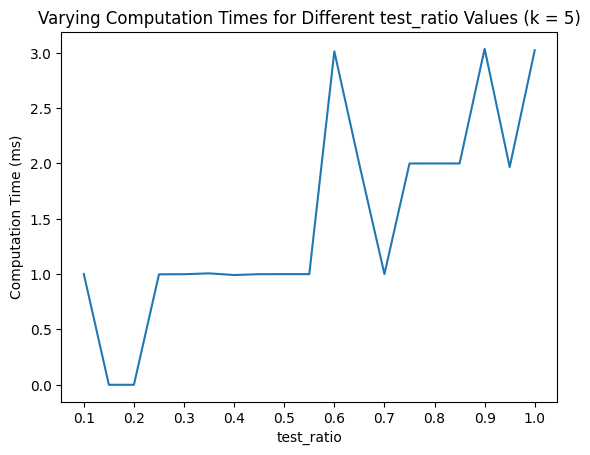

In [106]:
fig, ax = plt.subplots()
ax.plot(ks, computation_times)

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
x_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="test_ratio",
       ylabel="Computation Time (ms)",
       title="Varying Computation Times for Different test_ratio Values (k = 5)")
plt.show()
